In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from joblib import dump, load
%matplotlib inline

plt.style.use('seaborn')

In [2]:
month = 'nov'
print(month)

# read saved dataset.
df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()

# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))

nov


'number of valid meterids:'

118

### Get clustering info

In [3]:
from sklearn.cluster import KMeans

In [4]:
def get_monthly_result(month='nov', n_clusters=3):
    print(month)
    # read saved dataset.
    df_normalized = pd.read_csv(f'data/normalized_{month}.csv')
    df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
    df_normalized.head()

    # get groups and keys on dataset.

    new_groups = df_normalized.groupby('meterid')
    new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

    new_id_list = list(new_keys)
    display('number of valid meterids:', len(new_id_list))

    #  Construct dataframe over which to run correlation analysis.

    df_total = pd.DataFrame()
    display(df_total)
    for key in new_id_list:
        df_i = new_groups.get_group(key).rename(columns={'norm_cumul_value': f'{key}'}).reset_index()    
        df_total = pd.concat([df_total, df_i[f'{key}']], axis=1)

    display(len(df_total))
    #display(df_total)  # column names are meterids

    # get corr matrix

    df_total = df_total.fillna(0)
    df_corr = df_total.corr()  # get correlations between meterids for the month's cumulative vals.
    df_corr = df_corr.fillna(0)
    #display(df_corr)

    # find top n positive correlations per meterid
#     n = 10
#     for meterid in new_id_list[1:2]:    
#         # slice is to show an example.
#         df_corr_sorted = df_corr[f'{meterid}'].sort_values(ascending=False)
#         sr_top5 = df_corr_sorted.iloc[1:1+n]
#         df_top5 = sr_top5.to_frame()
#         df_top5 = df_top5.rename(columns={f'{meterid}': 'r'})

#         data = [meterid for i in range(n)]
#         df_top5 = df_top5.assign(id=data)
#         display(df_top5)

    # clustering

    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(df_corr)
    labels = kmeans.labels_
    print(labels)

    origin_date = df_normalized['index'].iloc[0]

    for cluster_label in range(n_clusters):
        fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,3))
        axes.set_title(f'cluster {cluster_label}; count: {list(labels).count(cluster_label)}')
        axes.set_xlabel(f'hours elapsed since {origin_date}')
        axes.set_ylabel(f'cumul value')
        i = 0
        for key in new_id_list:
            if labels[i] == cluster_label:
                axes.scatter(df_total.index, df_total[f'{key}'])

            i += 1

nov


'number of valid meterids:'

118

""


721

[1 1 1 0 0 0 0 2 2 0 0 0 0 2 1 0 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0
 2 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 2 1 2 0 0 2
 1 0 0 0 0 0 0 0 2 1 1 0 0 2 0 2 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 2 0 0 0 2
 0 0 0 0 0 1 1]
dec


'number of valid meterids:'

119

""


745

[0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 2 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 1 0]
jan


'number of valid meterids:'

119

""


745

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 0 2 0 2 2 2 2 2 2 2
 0 2 2 2 2 2 2 2]
feb


'number of valid meterids:'

118

""


697

[1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 2 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 1]
mar


'number of valid meterids:'

90

""


745

[0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 2 0 0 2 0 2 0 0 0 2 2 2 0 0 2 0 0 0 0 0 2 1
 0 2 0 2 1 0 0 0 0 0 0 1 2 2 0 2 0 1 2 0 0 2 0 0 0 2 0 2 0 2 0 2 0 2 2 0 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0]


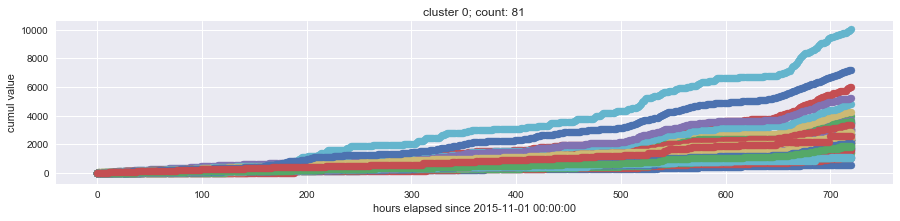

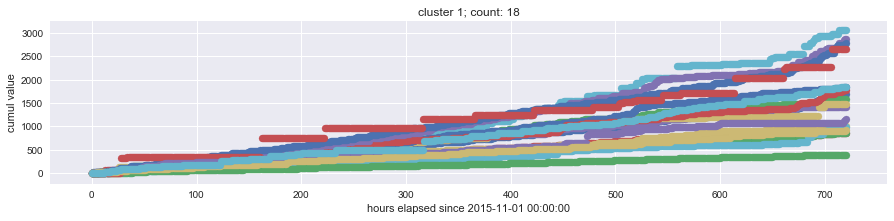

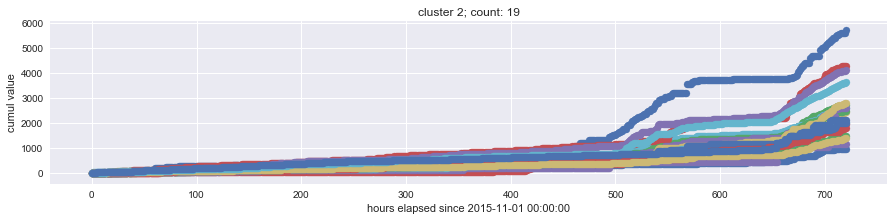

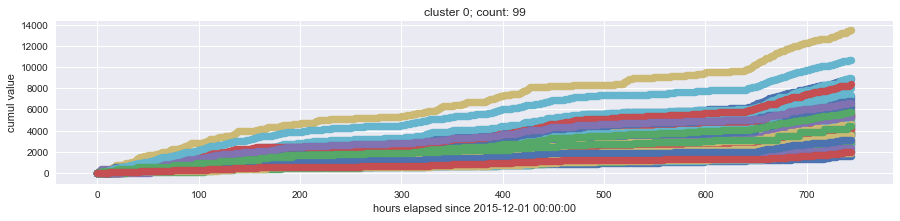

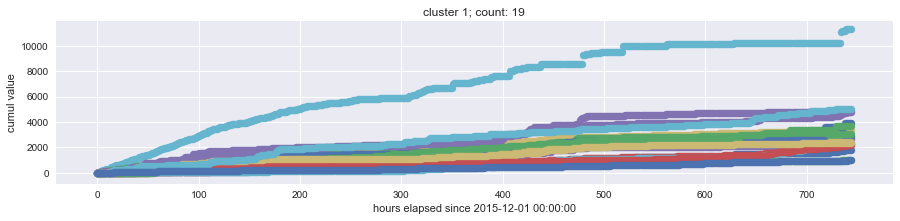

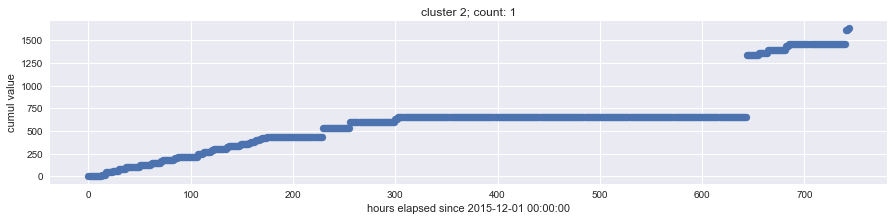

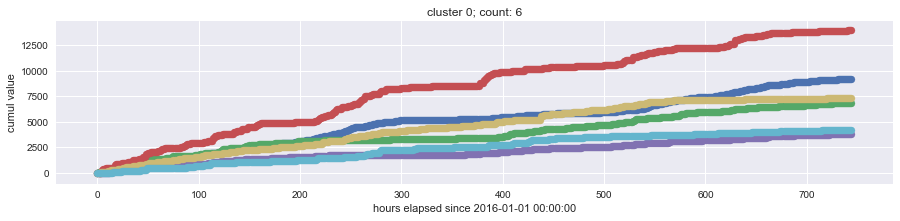

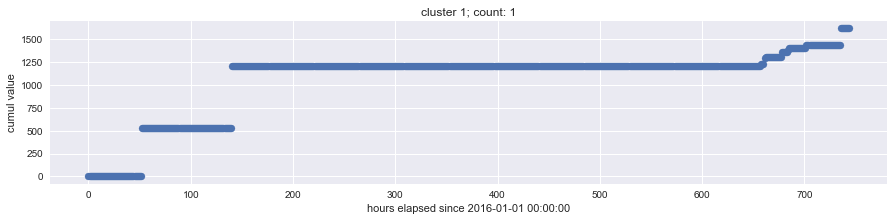

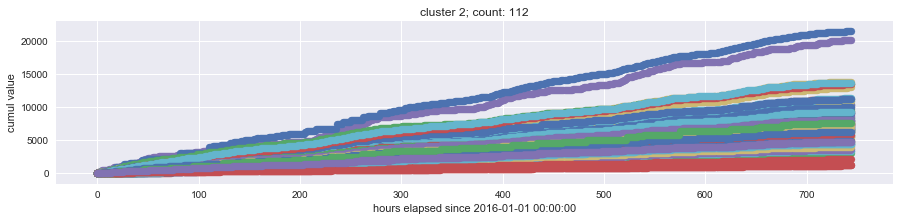

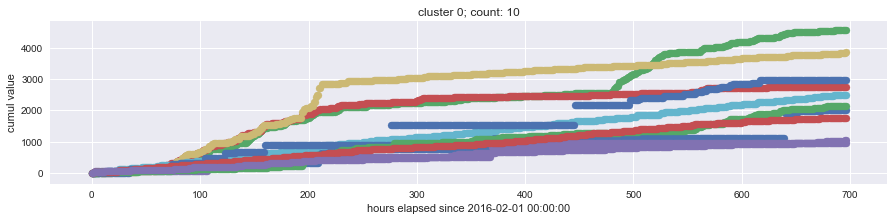

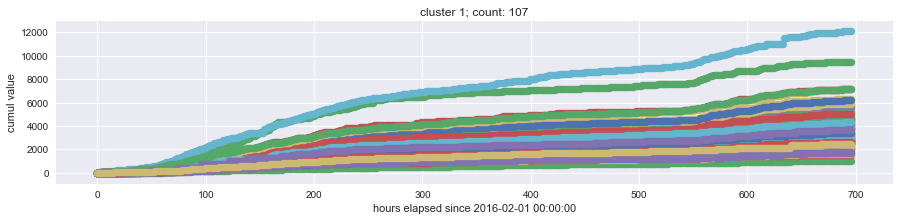

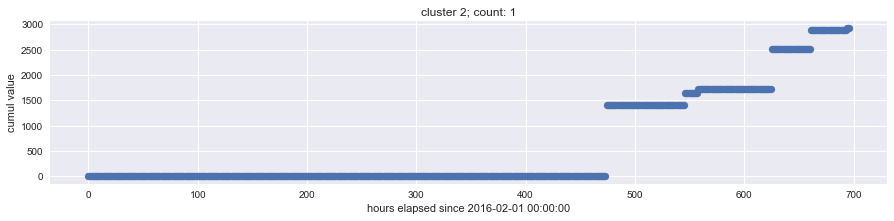

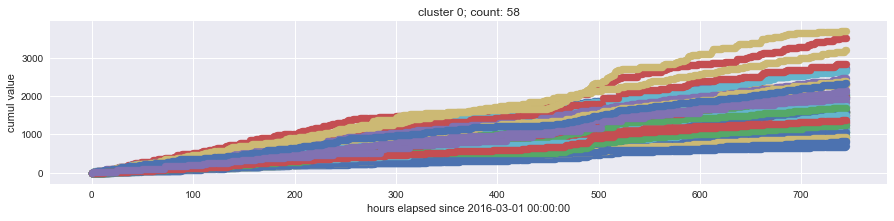

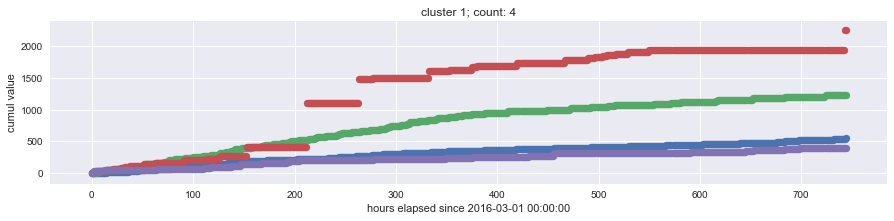

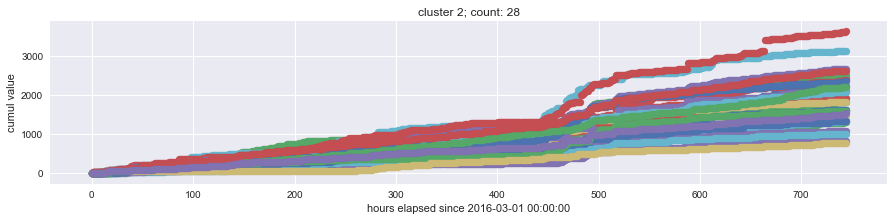

In [5]:
months = ['nov', 'dec', 'jan', 'feb', 'mar']
n_clusters = 3
for month in months:
    get_monthly_result(month, n_clusters)

### Add cluster label to data

In [6]:
# cluster labels for month=nov and n_clusters=3
labels = [2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1,\
          1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1,\
          1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1,\
          1, 1, 1, 1, 0, 2, 2, 1, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1,\
          1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 2]

df_new = pd.DataFrame()
for i in range(len(new_id_list)):
    df_i = new_groups.get_group(new_id_list[i])
    df_i['cluster_label'] = labels[i]
    df_new = df_new.append(df_i, ignore_index=True)
df_new.head()

C:\Users\Melvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,index,marginal_change,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,norm_cumul_value,time_integer,label,cluster_label
0,2015-11-01 00:00:00,0.0,35,67.0,75.0,3.0,0.0,0,0,2
1,2015-11-01 01:00:00,12.0,35,67.0,75.0,3.0,12.0,1,0,2
2,2015-11-01 02:00:00,0.0,35,67.0,75.0,3.0,12.0,2,0,2
3,2015-11-01 03:00:00,2.0,35,67.0,75.0,3.0,14.0,3,0,2
4,2015-11-01 04:00:00,0.0,35,67.0,75.0,3.0,14.0,4,0,2


In [7]:
# split all data into three datasets (train, val, test) by time period.

def split_agg_data(train_size=0.8, valid_size=0.1):
    # df.loc[(df['column_name'] >= A) & (df['column_name'] <= B)]
    num_samples_per_meterid = len(df_new) / len(new_id_list)  # this must be a whole number
    
    test_end = train_size * num_samples_per_meterid
    val_end = (train_size+valid_size) * num_samples_per_meterid
    
    train_mask = (df_new['time_integer'] >= 0) & (df_new['time_integer'] < test_end)
    val_mask = (df_new['time_integer'] >= test_end) & (df_new['time_integer'] < val_end)
    test_mask = (df_new['time_integer'] >= val_end) & (df_new['time_integer'] < num_samples_per_meterid)
        
    df_train = df_new.loc[train_mask]
    df_val = df_new.loc[val_mask]
    df_test = df_new.loc[test_mask]

    return df_train, df_val, df_test

In [8]:
df_train, df_val, df_test = split_agg_data(train_size=0.8, valid_size=0.1)

In [9]:
# x_column_names = ['time_integer', 'label', 'cluster_label',\
#                   'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']

x_column_names = ['meterid', 'label', 'cluster_label',\
                'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']

x_train = df_train[x_column_names].to_numpy()
x_valid = df_val[x_column_names].to_numpy()
x_test = df_test[x_column_names].to_numpy()

y_train = df_train['norm_cumul_value'].to_numpy()
y_valid = df_val['norm_cumul_value'].to_numpy()
y_test = df_test['norm_cumul_value'].to_numpy()

In [ ]:
### Get data for all months

In [47]:
df_normalized = pd.read_csv(f'data/normalized_all.csv')
df_normalized = df_normalized.drop(columns=['Unnamed: 0'])
df_normalized.head()
# get groups and keys on dataset.

new_groups = df_normalized.groupby('meterid')
new_keys = new_groups.groups.keys()  # keys: an iterable of dataids or meter ids

new_id_list = list(new_keys)
display('number of valid meterids:', len(new_id_list))
df_i = new_groups.get_group(35)
df_i.tail()

'number of valid meterids:'

89

,index,marginal_change,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,norm_cumul_value,time_integer,label
3644,2016-03-31 20:00:00,2.0,35,76.0,59.0,5.0,10226.0,3644,0
3645,2016-03-31 21:00:00,0.0,35,76.0,59.0,5.0,10226.0,3645,0
3646,2016-03-31 22:00:00,0.0,35,76.0,59.0,5.0,10226.0,3646,0
3647,2016-03-31 23:00:00,0.0,35,76.0,59.0,5.0,10226.0,3647,0
3648,2016-04-01 00:00:00,10.0,35,76.0,59.0,5.0,10236.0,3648,0


In [205]:
df_all_dayresampled = pd.DataFrame()
features = ['time_integer', 'meterid', 'TempAvgF', 'HumidityAvgPercent', 'WindAvgMPH']
for meterid in new_id_list:
    df_i = new_groups.get_group(meterid)
    df_i = df_i.set_index(pd.to_datetime(df_i['index']))
    df_i = df_i.drop(columns=['index'])

    ser_mc = df_i['marginal_change']
    
    df_features = df_i[features]

    ser_mc_resampled = ser_mc.resample('D').sum()
    df_features_resampled = df_i[features].resample('D').first().ffill()

    df_i_dayresampled = df_features_resampled.join(ser_mc_resampled)
    
    df_all_dayresampled = df_all_dayresampled.append(df_i_dayresampled, ignore_index=True)

In [206]:
df_all_dayresampled.tail()

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
13612,3552,9766,62.0,51.0,4.0,2.0
13613,3576,9766,64.0,76.0,6.0,98.0
13614,3600,9766,73.0,88.0,7.0,12.0
13615,3624,9766,76.0,59.0,5.0,74.0
13616,3648,9766,76.0,59.0,5.0,0.0


In [321]:
df_35 = df_all_dayresampled.loc[df_all_dayresampled['meterid'] == new_id_list[5]]

In [322]:
df_35.tail()

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
913,3552,483,62.0,51.0,4.0,32.0
914,3576,483,64.0,76.0,6.0,36.0
915,3600,483,73.0,88.0,7.0,52.0
916,3624,483,76.0,59.0,5.0,22.0
917,3648,483,76.0,59.0,5.0,14.0


In [323]:
df_35

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
765,0,483,67.0,75.0,3.0,0.0
766,24,483,68.0,75.0,3.0,16.0
767,48,483,69.0,74.0,3.0,18.0
768,72,483,70.0,82.0,5.0,34.0
769,96,483,79.0,83.0,6.0,20.0
...,...,...,...,...,...,...
913,3552,483,62.0,51.0,4.0,32.0
914,3576,483,64.0,76.0,6.0,36.0
915,3600,483,73.0,88.0,7.0,52.0
916,3624,483,76.0,59.0,5.0,22.0


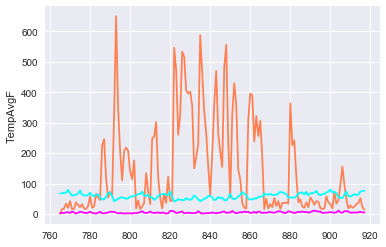

In [324]:
ax = sns.lineplot(x = df_35.index, y="marginal_change", color = "coral",data=df_35)
ax = sns.lineplot(x = df_35.index, y="WindAvgMPH", color = "magenta",data=df_35)
# ax = sns.lineplot(x = df_35.index, y="HumidityAvgPercent", color = "teal",data=df_35)
ax = sns.lineplot(x = df_35.index, y="TempAvgF", color = "cyan",data=df_35)
# ax = sns.lineplot(x = df_35.index, y="WindAvgMPH", color = "blue",data=df_35)
# plt.plot(np.arange(-44, 44), np.arange(-44, 44), color = "orange")
# plt.title('GP Test Set Analysis: 2009 to 2014')

In [325]:
df_35_train = df_35.iloc[0:100]

In [326]:
df_35_valid = df_35.iloc[100:120]

In [327]:
df_35_test = df_35.iloc[120:len(df_35)]

In [328]:
df_35_train.head()

,time_integer,meterid,TempAvgF,HumidityAvgPercent,WindAvgMPH,marginal_change
765,0,483,67.0,75.0,3.0,0.0
766,24,483,68.0,75.0,3.0,16.0
767,48,483,69.0,74.0,3.0,18.0
768,72,483,70.0,82.0,5.0,34.0
769,96,483,79.0,83.0,6.0,20.0


In [329]:
x_train = df_35_train[['TempAvgF']].to_numpy()
y_train = df_35_train['marginal_change'].to_numpy()
x_valid = df_35_valid[['TempAvgF']].to_numpy()
y_valid = df_35_valid['marginal_change'].to_numpy()
x_test = df_35_test[['TempAvgF']].to_numpy()
y_test = df_35_test['marginal_change'].to_numpy()

# Linear Regression

In [330]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
# run predictions and get scores

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [331]:
y_train_pred = lr_model.predict(x_train)
r2_train = lr_model.score(x_train, y_train)

y_valid_pred = lr_model.predict(x_valid)
r2_valid = lr_model.score(x_valid, y_valid)

y_test_pred = lr_model.predict(x_test)
r2_test = lr_model.score(x_test, y_test)

In [332]:
print(r2_train)
print(r2_valid)
print(r2_test)

0.7168521199048805
0.5194161765316292
-12.942432472265471


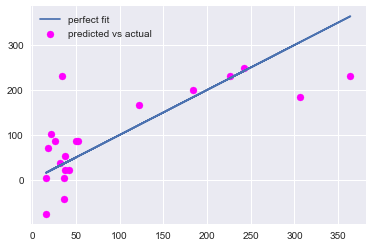

In [333]:
import seaborn as sns
# test1_sns = sns.load_dataset("test1")
plt.scatter(y_valid, y_valid_pred, color='magenta', label='predicted vs actual')
plt.plot(y_valid, y_valid, label='perfect fit')
plt.legend()

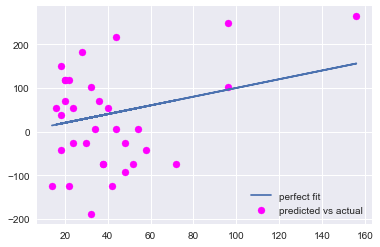

In [334]:
import seaborn as sns
# test1_sns = sns.load_dataset("test1")
plt.scatter(y_test, y_test_pred, color='magenta', label='predicted vs actual')
plt.plot(y_test, y_test, label='perfect fit')
plt.legend()

In [335]:
# # plot timeseries of predicted and actual values.

# plt.title(f'r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
# plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
# plt.plot(df_train['time_integer'], y_train, label='actual train')
# plt.plot(df_train['time_integer'], y_train_pred, label='prediction on train')

# plt.plot(df_val['time_integer'], y_valid, label='actual val')
# plt.plot(df_val['time_integer'], y_valid_pred, label='prediction on val')

# plt.plot(df_test['time_integer'], y_test, label='actual test')
# plt.plot(df_test['time_integer'], y_test_pred, label='prediction on test')

# plt.legend()

# SVR

In [336]:
from sklearn.svm import SVR
model = SVR(C = 1159, gamma = 'scale', kernel = 'rbf')
model.fit(x_train, y_train)

SVR(C=1159, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [337]:
y_train_pred = model.predict(x_train)
r2_train = model.score(x_train, y_train)

y_valid_pred = model.predict(x_valid)
r2_valid = model.score(x_valid, y_valid)

y_test_pred = model.predict(x_test)
r2_test = model.score(x_test, y_test)

In [338]:
print('r2 train = ' + str(r2_train))
print('r2 valid = ' + str(r2_valid))
print('r2 test = ' + str(r2_test))

r2 train = 0.8239544828970427
r2 valid = 0.5407472911921727
r2 test = -1.3615476426356885


In [339]:
# # plot timeseries of predicted and actual values.

# plt.title(f'r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
# plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
# plt.plot(df_train['time_integer'], y_train, label='actual train')
# plt.plot(df_train['time_integer'], y_train_pred, label='prediction on train')

# plt.plot(df_val['time_integer'], y_valid, label='actual val')
# plt.plot(df_val['time_integer'], y_valid_pred, label='prediction on val')

# plt.plot(df_test['time_integer'], y_test, label='actual test')
# plt.plot(df_test['time_integer'], y_test_pred, label='prediction on test')

# plt.legend()

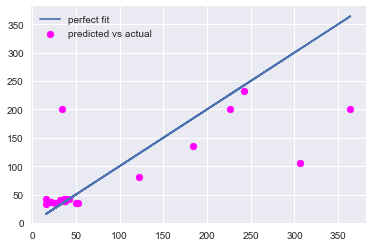

In [340]:
plt.scatter(y_valid, y_valid_pred, color='magenta', label='predicted vs actual')
plt.plot(y_valid, y_valid, label='perfect fit')
plt.legend()

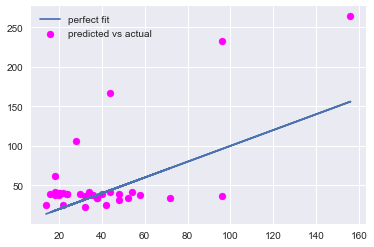

In [341]:
plt.scatter(y_test, y_test_pred, color='magenta', label='predicted vs actual')
plt.plot(y_test, y_test, label='perfect fit')
plt.legend()

### Walk-forward Validation

In [342]:
day_groups = df_all_dayresampled.groupby('meterid')

def split_data(x_column_names=[], origin_date=None, end_date=None, meterid=35, train_size=0.8, valid_size=0.1):
    
    df_i = day_groups.get_group(meterid)

    # zoom in on specified time period.
    if origin_date is not None and end_date is not None:
        df_i = zoom(df_i, origin_date, end_date)
     
    X = df_i[x_column_names].to_numpy()
    
    #y = df_i['norm_cumul_value'].to_numpy().astype('int')
    y = df_i['marginal_change'].to_numpy().astype('int')

    # split dataset
    valid_start, test_start = int(len(df_i)*train_size), int(len(df_i)*(train_size+valid_size))
    x_train, x_valid, x_test = X[:valid_start,:], X[valid_start:test_start,:], X[test_start:,:]
    y_train, y_valid, y_test = y[:valid_start], y[valid_start:test_start], y[test_start:]
    return X, x_train, x_valid, x_test, y, y_train, y_valid, y_test

# rolling window walk forward validation:
def rolling_walk_forward_val_plusn(model, X, y, n, window_size=250):
    # predict t+1+n into the future
    #window_size = 250
    predictions = []
    
    for i in range(0, len(X) - window_size - n):
        train_x, test_x = X[i:i+window_size], X[i+window_size:i+window_size+1+n]
        train_y, test_y = y[i:i+window_size], y[i+window_size:i+window_size+1+n]
        # train model, predict next timestep, record prediction
        model.fit(train_x, train_y)
        pred = model.predict(test_x)[0]
        predictions.append(pred)

    predictions_arr = np.asarray(predictions)

    # overall evaluation of model performance:
    # 1. correlation analysis of predicted vs actual?
    # 2. R^2 and RMSE
    # 3. plot residual and prediction error and observe.
    mse = mean_squared_error(y_true=y[window_size+n:], y_pred=predictions_arr)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_true=y[window_size+n:], y_pred=predictions_arr)
    
    # naive baseline prediction based on t-1
    #y_naive_base = np.roll(y[window_size:], shift=1)
    #y_naive_base[0] = y_naive_base[1]
    #r2base = r2_score(y_true=y[window_size:], y_pred=y_naive_base)
    
    time = np.arange(start=0, stop=len(X), step=1).reshape(-1, 1)
    
    plt.cla()
    plt.plot(time[window_size+n:], y[window_size+n:], label='actual')
    plt.plot(time[window_size+n:], predictions_arr, label='predicted')
    #plt.plot(X[window_size:], y_naive_base, label='baseline')

    plt.title(f'next {1+n}hour forecast for meterid {meterid}; r2:{r2:.3f} rmse:{rmse:.3f}')
    plt.xlabel(f'days elapsed since {df_normalized["index"].iloc[0]}') 
    plt.legend()
    plt.show()
    return rmse, r2, predictions_arr

In [351]:
# 'time_integer', 'HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF'
features = ['HumidityAvgPercent', 'WindAvgMPH', 'TempAvgF']
meterid = new_id_list[5]
X, x_train, x_valid, x_test, y, y_train, y_valid, y_test = split_data(x_column_names=features, meterid=meterid)

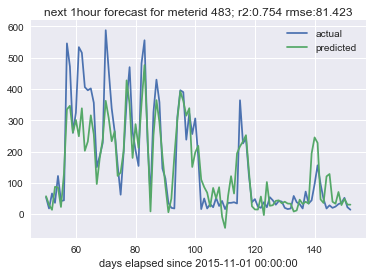

In [352]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
import math
model = SVR(C = 1159, gamma = 'scale', kernel = 'rbf')
n = 0
rmse, r2, predictions_arr = rolling_walk_forward_val_plusn(model, X, y, n, window_size=50)

### Normal Validation

In [353]:
X, x_train, x_valid, x_test, y, y_train, y_valid, y_test = split_data(x_column_names=features, meterid=meterid)

In [354]:
model = SVR(C = 1159, gamma = 'scale', kernel = 'rbf')
model.fit(x_train, y_train)

SVR(C=1159, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [355]:
y_train_pred = model.predict(x_train)
r2_train = model.score(x_train, y_train)

y_valid_pred = model.predict(x_valid)
r2_valid = model.score(x_valid, y_valid)

y_test_pred = model.predict(x_test)
r2_test = model.score(x_test, y_test)

In [356]:
print('r2 train = ' + str(r2_train))
print('r2 valid = ' + str(r2_valid))
print('r2 test = ' + str(r2_test))

r2 train = 0.822708614768068
r2 valid = -8.019976547179782
r2 test = -3.578597536388616


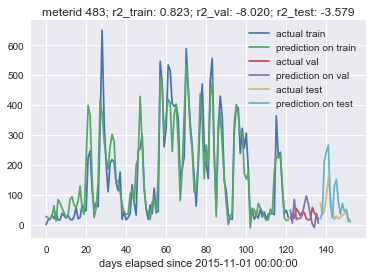

In [357]:
# plot trendline and actual line.
time = np.arange(start=0, stop=len(X), step=1).reshape(-1, 1)
plt.cla()
plt.title(f'meterid {meterid}; r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
plt.xlabel(f'days elapsed since {df_i.index[0]}') 
plt.plot(time[:len(x_train)], y_train, label='actual train')
plt.plot(time[:len(x_train)], y_train_pred, label='prediction on train')

plt.plot(time[len(x_train):len(x_train)+len(x_valid)], y_valid, label='actual val')
plt.plot(time[len(x_train):len(x_train)+len(x_valid)], y_valid_pred, label='prediction on val')

plt.plot(time[len(x_train)+len(x_valid):], y_test, label='actual test')
plt.plot(time[len(x_train)+len(x_valid):], y_test_pred, label='prediction on test')

plt.legend()
plt.show()

### MARGINAL CHANGE IS PREDICTED WELL BY DAILY AVERAGE TEMPERATURE!

# Gaussian Processes

In [ ]:
import gpflow

In [ ]:
df

In [ ]:
dims = len(x_column_names)
length = len(x_train)

# k = gpflow.kernels.RBF(120)
# k = gpflow.kernels.RBF(input_dim=120, variance=1., lengthscales=0.5)
# k = gpflow.kernels.RBF(input_dim=10, variance=1., lengthscales=0.2)
k = gpflow.kernels.Matern32(input_dim=dims, variance=1.,lengthscales=0.5)
# k = k + k2

# k = gpflow.kernels.White(input_dim=120)
# k = gpflow.kernels.Linear(input_dim=120)

# meanf = gpflow.mean_functions.Constant(c=np.zeros((1,1)))
meanf = gpflow.mean_functions.Linear(np.zeros((dims,length)),np.zeros(length))
# meanf = gpflow.mean_functions.Constant(1)
m = gpflow.models.GPR(x_train, y_train.reshape(length,1), k, meanf)
m.likelihood.variance = 0.01

In [ ]:
m.as_pandas_table()

In [ ]:
gpflow.train.ScipyOptimizer().minimize(m)
# plot(m)
m.as_pandas_table()

In [ ]:
results = m.predict_y(x_valid)
results

In [ ]:
np.array(results).shape

In [ ]:
y_valid_length = len(y_valid)
y_valid_length

In [ ]:
y_pred = np.zeros(y_valid_length)
for i in range(y_valid_length):
    y_pred[i] = np.mean(results[0][i])

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_valid, y_pred))
rmse

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_valid, test1)

# GBMs

In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score

In [ ]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_valid = lgb.Dataset(x_valid, label = y_valid)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

In [ ]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

In [ ]:
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=60,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

In [ ]:
print('Saving model...')
# save model to file
gbm.save_model('model.txt')

print('Starting predicting...')
# predict
y_pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)
# eval

print('The r2 of prediction is:', r2_score(y_valid, y_pred))

In [ ]:
#run predictions and get scores
y_train_pred = gbm.predict(x_train, num_iteration=gbm.best_iteration)
r2_train = r2_score(y_train_pred, y_train)

y_valid_pred = gbm.predict(x_valid, num_iteration=gbm.best_iteration)
r2_valid = r2_score(y_valid_pred, y_valid)

y_test_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
r2_test = r2_score(y_test_pred, y_valid)

In [ ]:
print('r2 train = ' + str(r2_train))
print('r2 valid = ' + str(r2_valid))
print('r2 test = ' + str(r2_test))

In [ ]:
# plot timeseries of predicted and actual values.

plt.title(f'r2_train: {r2_train:.3f}; r2_val: {r2_valid:.3f}; r2_test: {r2_test:.3f}')
plt.xlabel(f'hours elapsed since {df_i.index[0]}') 
plt.plot(df_train['time_integer'], y_train, label='actual train')
plt.plot(df_train['time_integer'], y_train_pred, label='prediction on train')

plt.plot(df_val['time_integer'], y_valid, label='actual val')
plt.plot(df_val['time_integer'], y_valid_pred, label='prediction on val')

plt.plot(df_test['time_integer'], y_test, label='actual test')
plt.plot(df_test['time_integer'], y_test_pred, label='prediction on test')

plt.legend()